# Cryptocurrency Price Prediction

#### Import Libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Load Data

In [107]:
#   Data obtained from Yahoo Finance

df_BTC = pd.read_csv('BTC.csv')
df_ETH = pd.read_csv('ETH.csv')
df_LTC = pd.read_csv('LTC.csv')

In [108]:
df_BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451
1,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112
2,2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720
3,2021-03-03,48415.816406,52535.136719,48274.320313,50538.242188,50538.242188,53220811975
4,2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,52343816680


In [109]:
df_ETH.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-28,1459.860474,1468.391479,1300.472168,1416.048950,1416.048950,27637026080
1,2021-03-01,1417.151123,1567.694580,1416.416138,1564.707642,1564.707642,24032838645
2,2021-03-02,1564.063477,1597.610107,1461.325439,1492.608765,1492.608765,22523669722
3,2021-03-03,1491.451172,1650.360596,1481.905762,1575.853149,1575.853149,22674780680
4,2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,22906118718


In [110]:
df_LTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-28,172.102188,172.646179,154.799789,164.927170,164.927170,5945000101
1,2021-03-01,164.983139,176.355164,163.966431,175.237900,175.237900,4627257694
2,2021-03-02,175.209686,184.730499,171.199631,177.872437,177.872437,5247274825
3,2021-03-03,177.974365,196.258942,177.366501,188.525665,188.525665,6392122021
4,2021-03-04,188.458313,194.231857,177.324738,181.078644,181.078644,5488598135


### Prediction Model

In [116]:
#   Create a variable for prediction 'n' days out into the future
predict = 14

#   Create a new attribute which indicates the prediction
df_BTC['Prediction'] = df_BTC[['Close']].shift(-predict)
df_ETH['Prediction'] = df_ETH[['Close']].shift(-predict)
df_LTC['Prediction'] = df_LTC[['Close']].shift(-predict)

##### Print new column

In [117]:
df_BTC

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2021-02-28,46194.015625,46716.429688,43241.617188,45137.769531,45137.769531,53443887451,59302.316406
1,2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112,55907.199219
2,2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720,56804.902344
3,2021-03-03,48415.816406,52535.136719,48274.320313,50538.242188,50538.242188,53220811975,58870.894531
4,2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,52343816680,57858.921875
...,...,...,...,...,...,...,...,...
361,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093,NaN
362,2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159,NaN
363,2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129,NaN
364,2022-02-27,39098.699219,39778.941406,37268.976563,37709.785156,37709.785156,23450127612,NaN


In [118]:
df_ETH.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2021-02-28,1459.860474,1468.391479,1300.472168,1416.048950,1416.048950,27637026080,1854.564331
1,2021-03-01,1417.151123,1567.694580,1416.416138,1564.707642,1564.707642,24032838645,1791.702271
2,2021-03-02,1564.063477,1597.610107,1461.325439,1492.608765,1492.608765,22523669722,1806.971802
3,2021-03-03,1491.451172,1650.360596,1481.905762,1575.853149,1575.853149,22674780680,1823.449341
4,2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,22906118718,1782.855103


In [119]:
df_LTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2021-02-28,172.102188,172.646179,154.799789,164.927170,164.927170,5945000101,215.296097
1,2021-03-01,164.983139,176.355164,163.966431,175.237900,175.237900,4627257694,201.264618
2,2021-03-02,175.209686,184.730499,171.199631,177.872437,177.872437,5247274825,201.040634
3,2021-03-03,177.974365,196.258942,177.366501,188.525665,188.525665,6392122021,206.067932
4,2021-03-04,188.458313,194.231857,177.324738,181.078644,181.078644,5488598135,200.537308


In [124]:
#   Create a new indepedent Dataset
X_BTC = np.array(df_BTC[['Close']])
X_ETH = np.array(df_ETH[['Close']])
X_LTC = np.array(df_LTC[['Close']])

#   Remove last 14 rows
X_BTC = X_BTC[:-predict]
X_ETH = X_ETH[:-predict]
X_LTC = X_LTC[:-predict]

print(X_BTC)
#print(X_ETH)
#print(X_LTC)

[[45137.769531]
 [49631.242188]
 [48378.988281]
 [50538.242188]
 [48561.167969]
 [48927.304688]
 [48912.382813]
 [51206.691406]
 [52246.523438]
 [54824.117188]
 [56008.550781]
 [57805.121094]
 [57332.089844]
 [61243.085938]
 [59302.316406]
 [55907.199219]
 [56804.902344]
 [58870.894531]
 [57858.921875]
 [58346.652344]
 [58313.644531]
 [57523.421875]
 [54529.144531]
 [54738.945313]
 [52774.265625]
 [51704.160156]
 [55137.3125  ]
 [55973.511719]
 [55950.746094]
 [57750.199219]
 [58917.691406]
 [58918.832031]
 [59095.808594]
 [59384.3125  ]
 [57603.890625]
 [58758.554688]
 [59057.878906]
 [58192.359375]
 [56048.9375  ]
 [58323.953125]
 [58245.003906]
 [59793.234375]
 [60204.964844]
 [59893.453125]
 [63503.457031]
 [63109.695313]
 [63314.011719]
 [61572.789063]
 [60683.820313]
 [56216.183594]
 [55724.265625]
 [56473.03125 ]
 [53906.089844]
 [51762.273438]
 [51093.652344]
 [50050.867188]
 [49004.253906]
 [54021.753906]
 [55033.117188]
 [54824.703125]
 [53555.109375]
 [57750.175781]
 [57828.

In [128]:
#   Create a new dependenet Dataset
y_BTC = df_BTC['Prediction'].values
y_ETH = df_ETH['Prediction'].values
y_LTC = df_LTC['Prediction'].values

y_BTC = y_BTC[:-predict]
y_ETH = y_ETH[:-predict]
y_LTC = y_LTC[:-predict]

print(y_BTC)
#print(y_ETH)
#print(y_LTC)

[59302.316406 55907.199219 56804.902344 58870.894531 57858.921875
 58346.652344 58313.644531 57523.421875 54529.144531 54738.945313
 52774.265625 51704.160156 55137.3125   55973.511719 55950.746094
 57750.199219 58917.691406 58918.832031 59095.808594 59384.3125
 57603.890625 58758.554688 59057.878906 58192.359375 56048.9375
 58323.953125 58245.003906 59793.234375 60204.964844 59893.453125
 63503.457031 63109.695313 63314.011719 61572.789063 60683.820313
 56216.183594 55724.265625 56473.03125  53906.089844 51762.273438
 51093.652344 50050.867188 49004.253906 54021.753906 55033.117188
 54824.703125 53555.109375 57750.175781 57828.050781 56631.078125
 57200.292969 53333.539063 57424.007813 56396.515625 57356.402344
 58803.777344 58232.316406 55859.796875 56704.574219 49150.535156
 49716.191406 49880.535156 46760.1875   46456.058594 43537.511719
 42909.402344 37002.441406 40782.738281 37304.691406 37536.632813
 34770.582031 38705.980469 38402.222656 39294.199219 38436.96875
 35697.605469 3

### Training Data

In [132]:
#   Split data into 85% training and 15% testing
x_train, x_test, y_train, y_test = train_test_split(X_BTC, y_BTC, test_size = .15)
#x_train, x_test, y_train, y_test = train_test_split(X_ETH, y_ETH, test_size = 0.15)
#x_train, x_test, y_train, y_test = train_test_split(X_LTC, y_LTC, test_size = 0.15)

In [133]:
#   Train model
linReg = LinearRegression()
linReg.fit(x_train, y_train)


LinearRegression()

In [134]:
#   Test model
linReg_confidence = linReg.score(x_test, y_test)

print('The Linear Regression Confidence is:', linReg_confidence)

The Linear Regression Confidence is: 0.6326022698119086


In [136]:
#   Create a var to represent the 14 rows from the original data set 
x_predict = np.array(df_BTC[['Close']])[-predict:]
print(x_predict)

[[44575.203125]
 [43961.859375]
 [40538.011719]
 [40030.976563]
 [40122.15625 ]
 [38431.378906]
 [37075.28125 ]
 [38286.027344]
 [37296.570313]
 [38332.609375]
 [39214.21875 ]
 [39105.148438]
 [37709.785156]
 [41121.285156]]


In [138]:
#   Print the linear Regression model for the next n days
linReg_Prediction = linReg.predict(x_predict)
print(linReg_Prediction)

[44842.05027195 44376.98154342 41780.84442449 41396.38433124
 41465.52145231 40183.48724295 39155.22435997 40073.27422435
 39323.01709148 40108.5951124  40777.07661414 40694.37390246
 39636.33780542 42223.11229748]


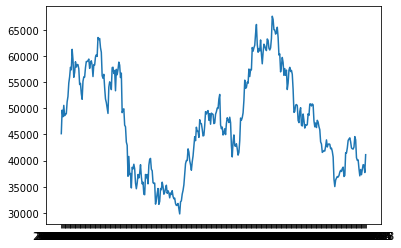

In [143]:
import matplotlib.pyplot as plt

plt.plot(df_BTC['Date'], df_BTC['Close'])